In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statistics as st

1. Gere um relatório em pdf, de estatística descritiva dos seus dados, contemplando:
1.1. Uma seção sobre análise univariada, em que incluirá distribuições de frequência para uma variável qualitativa e uma quantitativa;
1.2. Uma seção sobre gráficos univariados para ao menos uma variável de cada tipo (qualitativa nominal, qualitativa  ordinal, quantitativa discreta, quantitativa contínua);
1.3. Uma seção sobre análise bivariada, com ao menos uma distribuição de frequências e uma figura bivariadas;
1.4. Uma seção para medidas de posição (tendência central);
1.5. Uma seção sobre medidas de dispersão;
1.6. Em cada seção, interprete seus resultados, como se fossem verdadeiros, mesmo que sejam fictícios.
1.7. Sua equipe deverá recorrer a ferramentas informáticas para realização dos cálculos, das tabelas e figuras, bem como do próprio relatório.

# 0. Funções

In [2]:
def grafico_qualitativa(var,dataframe, ax=None):
     dados_qualitativa = dataframe[var].value_counts(normalize = True).reset_index(name='Frequência').rename(columns={'index':var})
     display(dados_qualitativa)
     
     if ax is None:
          fig, ax = plt.subplots(figsize=(12, 4))
          
     dados_grafico = dataframe[var].value_counts()
     dados_grafico = dataframe[var].value_counts()
     dados_grafico.plot(kind='bar', ax=ax)
     
     plt.xlabel('Valores')
     plt.ylabel('Frequência')
     plt.title(f'Gráfico da Frequência:{var}')

In [3]:
def histograma_Uni(varName,dataframe):
    n = len(dataframe[varName])
    k = round(np.sqrt(n))
    trainHist = dataframe[varName].hist(figsize=(4,2), bins=k);
    trainHist.set_xlabel(varName);
    trainHist.set_ylabel('Frequência');

In [4]:
def histograma(varName, dataframe):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sn.histplot(dataframe[varName], color='b', bins=100, ax=axs[0])
    dataframe[varName].plot(kind='box', ax=axs[1], title='')
    axs[1].set_ylabel(varName)
    plt.tight_layout()
    plt.show()

In [5]:
def QualiQualiAssociation(varName1, varName2,dataframe, ax=None):
    SQ_tb = pd.crosstab(index = dataframe[varName1],columns = dataframe[varName2], normalize = "index")#, margins = True
    title = "Conditional Proportion: " + varName2  + " per " +  varName1 
    print("******** " + title + " ********")
    display(SQ_tb)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 4))
    
    image = SQ_tb.plot(kind="bar", figsize=(12,4), stacked=False,title=title,fontsize=12,ax= ax)
    image.set_ylabel("%",fontsize=12)
    image.set_xlabel(varName1,fontsize=12)

In [6]:
def moda_czuber(data):
    freq = {}
    for i in data:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1

    moda = max(freq, key=freq.get)
    freq_anterior = freq.get(moda - 1, 0)
    freq_posterior = freq.get(moda + 1, 0)

    amplitude = None
    if len(data) >= 2:
        sorted_data = sorted(data)
        amplitude = sorted_data[1] - sorted_data[0]

    if amplitude is not None:
        return moda + ((freq_posterior - freq_anterior) / (2 * freq_posterior - 2 * freq[moda])) * amplitude
    else:
        return moda


In [7]:

def measuresOfPositionAndDispersion(data,key):
    dataset = pd.DataFrame({"Variable": key ,"Amount": len(data),"Mean": [st.mean(data.dropna())], "Mode ": moda_czuber(data.dropna()), "Median": [st.median(data.dropna())], "Variance": [st.variance(data.dropna())], "Standard deviation": [st.stdev(data.dropna())], "Amplitude": [max(data.dropna()) - min(data.dropna())]})
    return dataset

In [ ]:
def qualitativaXquantativa(varName1,varName2,dataframe,ax = None):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 4))
    title = varName1 + " per " + varName2
    ax.set_title(title, fontsize=12)
    sn.boxplot(data=dataframe, x=varName2, y=varName1, ax=ax)
    ax.set_ylabel(varName1, fontsize=12)
    ax.set_xlabel(varName2, fontsize=12)
    display(dataframe[[varName1, varName2]].groupby(varName2).describe())

# Estatistica descritiva

In [8]:
nome_arquivo_csv = 'dataset.csv'
dados = pd.read_csv(nome_arquivo_csv)

In [9]:
display(dados)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


Aqui entendermos melhor as variaveis de maior interesse e como elas se relacionam. Elas serão dividas em duas categorias, serão variáveis qualitativas e quantitativas.Elas serão analisadas por meio de gráficos de forma que entendamos melhor seus comportamentos e suas frequências.  
As variáveis de interesse serão:  
* __gender__: O sexo genotípico do paciente.  
* __icu_admit_source__: A localização do paciente antes de ser admitido na unidade.  
* __leukemia__: Se o paciente foi diagnosticado com leucemia mielóide aguda ou crônica, leucemia linfocítica aguda ou crônica ou mieloma múltiplo.  
* __diabetes_mellitus__: Se o paciente foi diagnosticado com diabetes, seja juvenil ou adulto, que requer medicação.  
* __solid_tumor_with_metastasis__: Se o paciente foi diagnosticado com algum carcinoma tumoral sólido (incluindo melanoma maligno) que apresenta evidência de metástase.  
* __hospital_death__: Se o paciente morreu durante esta hospitalização. 
 
As variáveis acima são qualitativas, veremos posteriormente se elas tem relação com a taxa de mortalidade. Elas foram escolhidas de modo a verificar se gênero, doenças e local de onde foram admitidas tem relação com morte.

__VARIAVEIS DE APACHE-III__
  
 Já as variáveis abaixo são qualitativas, serão analisadas para observar sua relação com a taxa de mortalidade, algumas delas foram escolihdas com base no diagnóstico APACHE-III pois são as categorias que mais pontuam nesse diagnóstico e assim podem ter grande interesse na taxa de mortalidade.  

* __heart_rate_apache__: A frequência cardíaca medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __temp_apache__: A temperatura medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __resprate_apache__: A frequência respiratória medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.
* __map_apache__: A pressão arterial média medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.


## 1.Gráficos univariados para cada variável

Aqui serão analisadas uma variavel de cada tipo, sendo elas:
* icu_admit_source (qualitativa nominal)
*  (qualitativa  ordinal) 
*  heart_rate_apache (quantitativa discreta)
*  apache_4a_icu_death_prob (quantitativa contínua)

 ### 1.1 icu_admit_source






 * A variavel icu_admit_source (qualitativa nominal) é a localizacao do paciiente antes de ser admitido na unidade.  
 Iremos agora analisar sua distribuição de frequência.

,icu_admit_source,Frequência
0,Accident & Emergency,0.590168
1,Operating Room / Recovery,0.204288
2,Floor,0.170424
3,Other Hospital,0.025742
4,Other ICU,0.009378


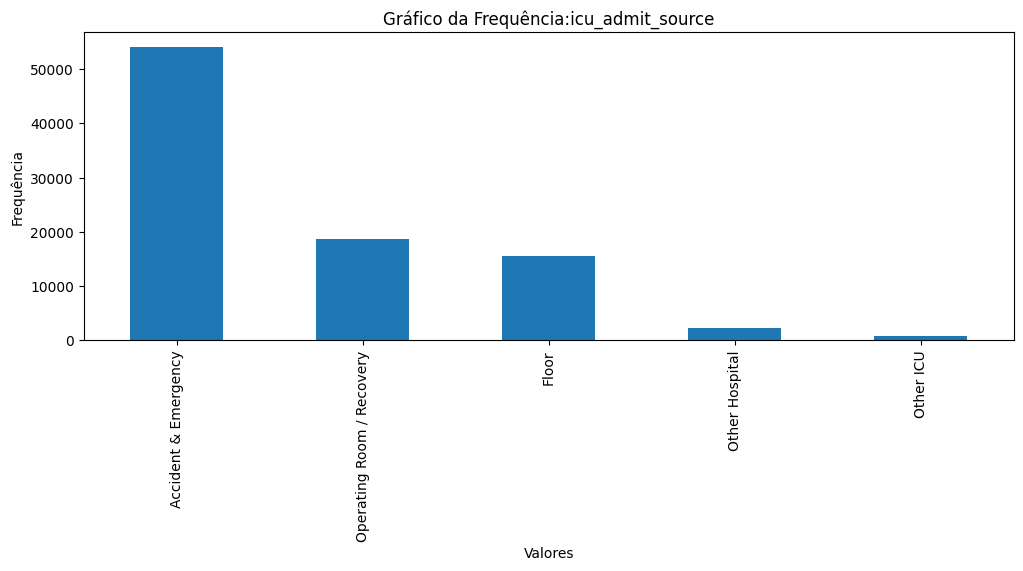

In [10]:

grafico_qualitativa("icu_admit_source", dados)

* Podemos perceber que a grande maioria das pessoas vem de acidente e emergência sendo 59.01% dos pacientes vindo desta localização ja os pacientes de vindo de outra unidade hospitalar ou de outra UTI são os menores representando juntos menos de 5% dos pacientes. 


### 1.2 
*  (qualitativa  ordinal) 

### 1.3 heart_rate_apache



* A variavel  heart_rate_apache (quantitativa discreta) é a frequência cardíaca medida durante as primeiras 24 horas que resulta na pontuação APACHE III mais alta.

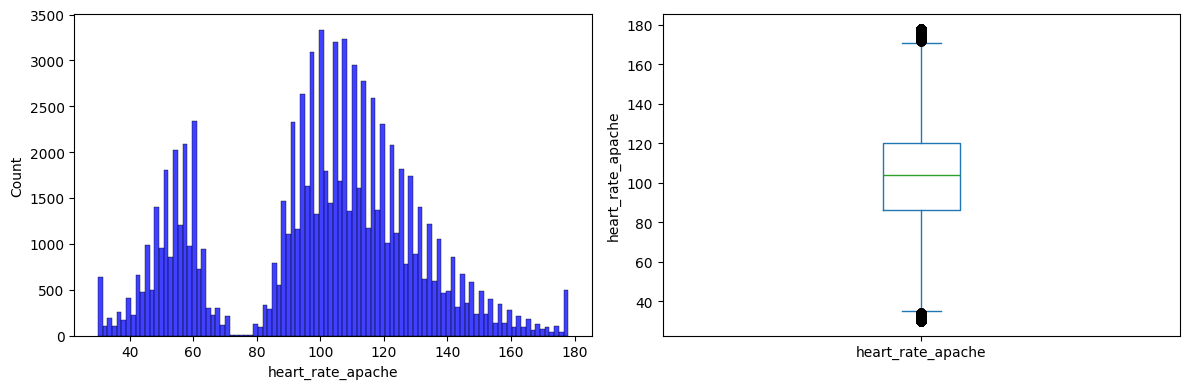

In [11]:
histograma("heart_rate_apache", dados)

*  Pelo histograma apresentado podemos perceber  que uma frequência cardiaca menor que 40 e maior que 180  ja representa pontos fora da curva.  
No gráfico podemos ver que há uma quantidade significativa de pontos assim, para essas pessoas pessoas com esse tipo de frequência podemos dizer que essas pessoas terão um APACHE-III mais alto.

### 1.4 apache_4a_icu_death_prob


* A variavel apache_4a_icu_death_prob (quantitativa contínua) é previsão probabilística APACHE IVa de mortalidade na UTI para o paciente que utiliza o escore APACHE III e outras covariáveis, incluindo diagnóstico.

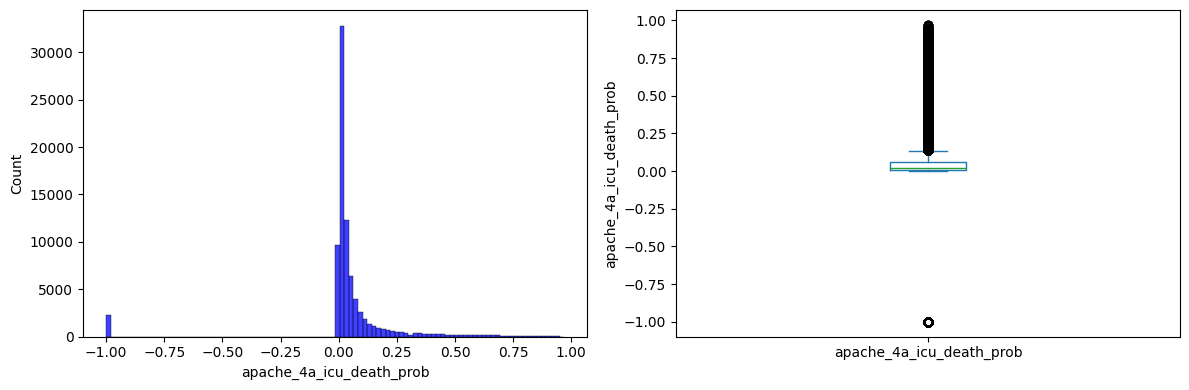

In [12]:
histograma("apache_4a_icu_death_prob", dados)

* No gráfico podemos ver varios pontos fora da curva ,as isso se da pq a grande maioria dos pacientes tem uma probabilidade bem baixa de morrer estando entre 0 e 0.10 de probabilidade.  
Assim, o grafico considera aqueles acima dessa quantidade como pontos aberrantes mas podemos ver que há uma quantidade bem pequena de pessoas com probabilidade acima de 0.25, tambem podemos ver que há um ponto aberrante para baixo o que provavelmente representa um erro de digitação.

Nesta seção abordaremos vários dos temas pedidos, aqui veremos gráficos univariados e bivariados lado lado para entendermos melhor como as variáveis se conectam e suas relações.

## 2. Gráficos univariados e bivariados para qualitativas

,gender,Frequência
0,M,0.539536
1,F,0.460464


******** Conditional Proportion: hospital_death per gender ********


hospital_death,0,1
gender,,
F,0.911627,0.088373
M,0.915583,0.084417


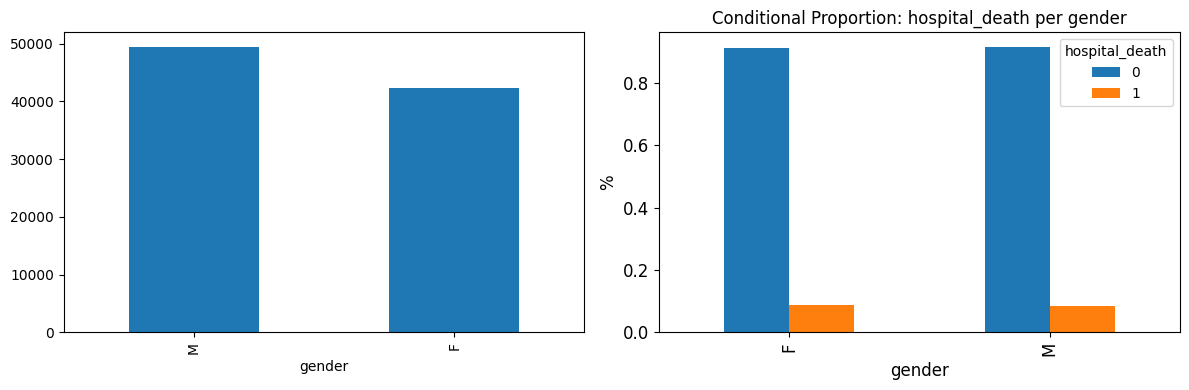

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("gender", dados, axs[0])
QualiQualiAssociation("gender","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Diante do gráfico podemos perceber que a quantidade de homens a entrar na UTI é um pouco maior, porem não interferência significativa nas mortes.  
Sendo a quantidade de mortes por genêro de 8,84% e a de morte por genêro masculino de 8,44%.

,leukemia,Frequência
0,0.0,0.992934
1,1.0,0.007066


******** Conditional Proportion: hospital_death per leukemia ********


hospital_death,0,1
leukemia,,
0.0,0.914659,0.085341
1.0,0.814930,0.185070


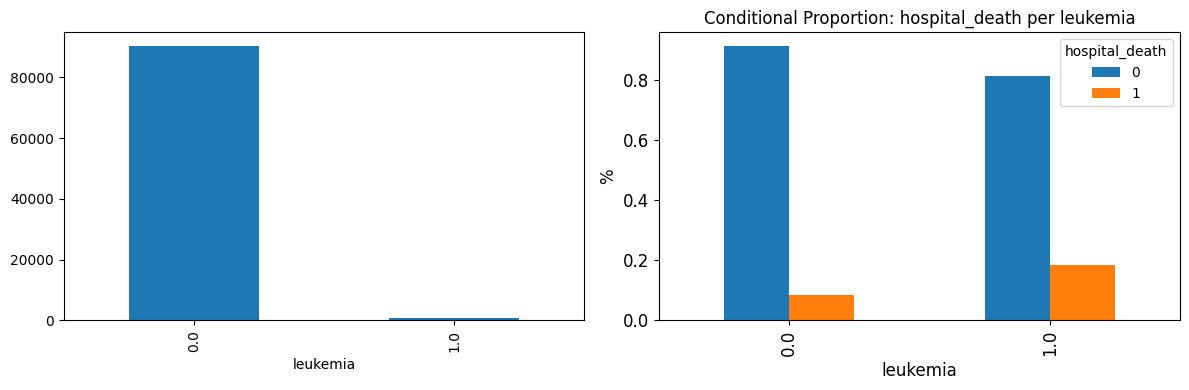

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("leukemia", dados, axs[0])
QualiQualiAssociation("leukemia","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Já diante do gráfico dos pacientes diagnosticados com leucemia vemos que somente 0,71% dos pacientes foram diagnosticados com essa doença, porém interfere de forma significativa nas mortes.  
 Os pacientes que não foram diagnosticados com leucemia tem somente 8.53%na taxa de mortalidade enquanto os pacientes diagnosticados com leucemia tem 18.51% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade.

,diabetes_mellitus,Frequência
0,0.0,0.774808
1,1.0,0.225192


******** Conditional Proportion: hospital_death per diabetes_mellitus ********


hospital_death,0,1
diabetes_mellitus,,
0.0,0.911568,0.088432
1.0,0.922165,0.077835


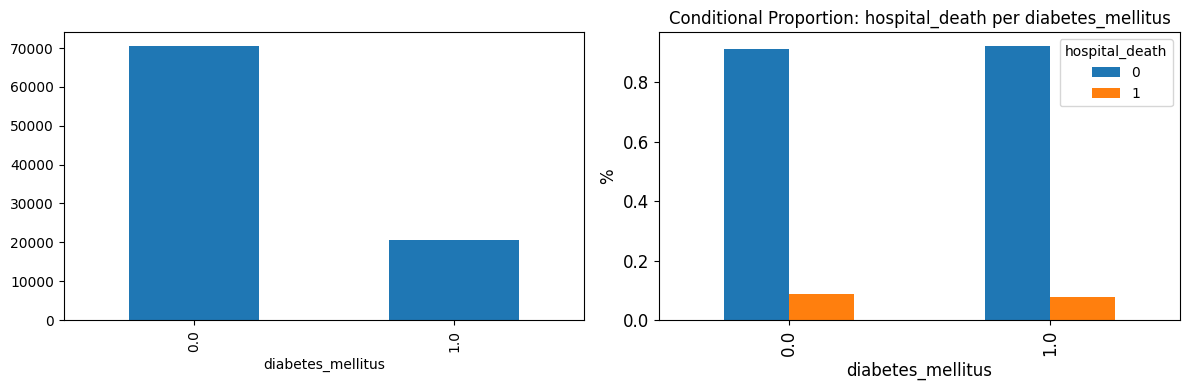

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("diabetes_mellitus", dados, axs[0])
QualiQualiAssociation("diabetes_mellitus","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Já na análise de pacientes com diabetes vemos que uma quantidade de 22.51% possuem a doença mas que ela não tem grande inteferência na taxa de mortalidade.
Dos pacientes que morreram 8.84% não possuiam a doença enquanto 7.78% possuiam a doença.

,solid_tumor_with_metastasis,Frequência
0,0.0,0.979362
1,1.0,0.020638


******** Conditional Proportion: hospital_death per solid_tumor_with_metastasis ********


hospital_death,0,1
solid_tumor_with_metastasis,,
0.0,0.916035,0.083965
1.0,0.815229,0.184771


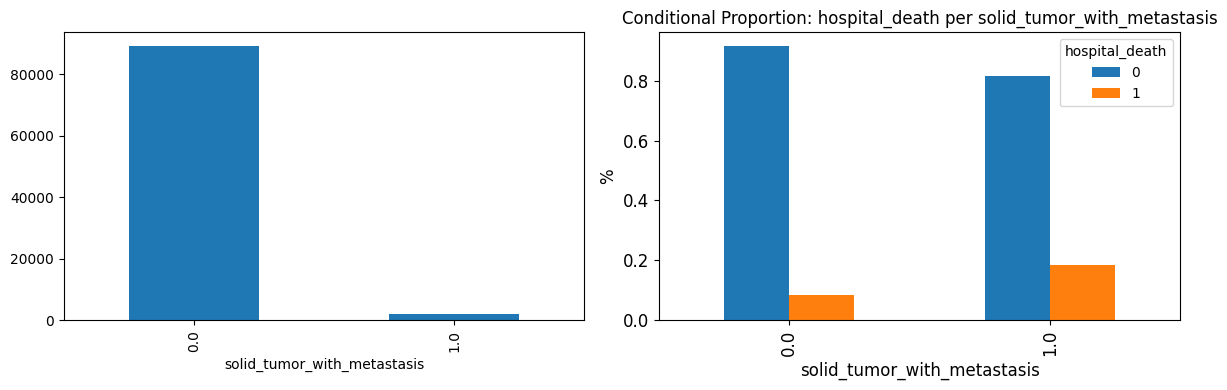

'solid_tumor_with_metastasis'

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("solid_tumor_with_metastasis", dados, axs[0])
QualiQualiAssociation("solid_tumor_with_metastasis","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()
"solid_tumor_with_metastasis"

* Na análise dos pacientes que possuem ou não tumor sólido com metástase vemos que somente 2.06% possuem a doença, mas ela possue uma grande interferência na taxa de mortalidade. 
 Os pacientes que não foram diagnosticados com tumor sólido com metástase tem somente 8.39% na taxa de mortalidade enquanto os pacientes diagnosticados com tumor sólido com metástase tem 18.48% de taxa de mortalidade apresentando assim aproximadamente 10% a mais na taxa de mortalidade. 


,icu_admit_source,Frequência
0,Accident & Emergency,0.590168
1,Operating Room / Recovery,0.204288
2,Floor,0.170424
3,Other Hospital,0.025742
4,Other ICU,0.009378


******** Conditional Proportion: hospital_death per icu_admit_source ********


hospital_death,0,1
icu_admit_source,,
Accident & Emergency,0.913615,0.086385
Floor,0.865864,0.134136
Operating Room / Recovery,0.962700,0.037300
Other Hospital,0.865564,0.134436
Other ICU,0.855646,0.144354


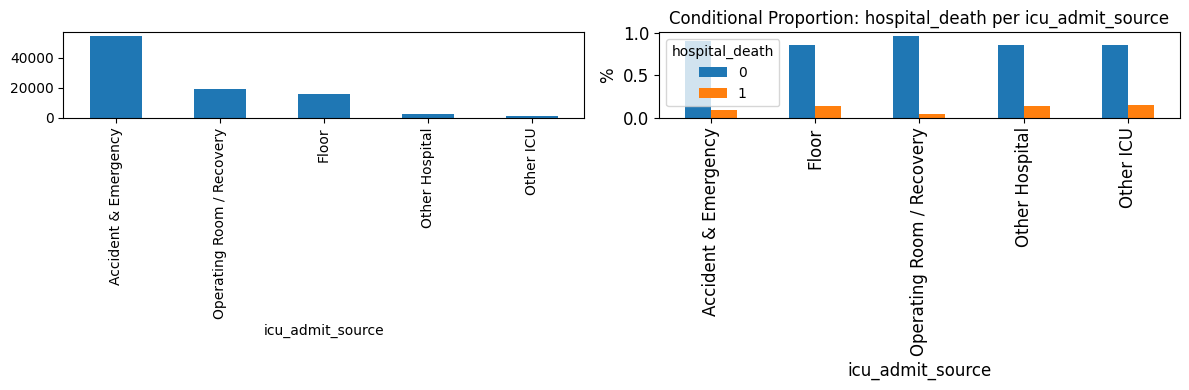

In [17]:

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
grafico_qualitativa("icu_admit_source", dados, axs[0])
QualiQualiAssociation("icu_admit_source","hospital_death",dados,axs[1])
plt.tight_layout()
plt.show()

* Na análise de localização do paciente antes de ser admitido na unidade vemos que a grande maioria dos pacientes vem da emergência e acidentes e que a minoria vem de outras UTI´s.  
Porém na taxa de mortalidade uma pequena maioria de mortes é dos pacientes que vem de outra UTI e a menor taxa são dos pacientes que vem sala de operação e recuperação.

Na análise de variáveis qualitativas podemos ver que as variáveis que mais afetam na taxa de mortalide e portanto as de maior interesse são:  
* os pacientes diagnosticados com leucemia.
* os pacientes diagnosticados com tumor solido com metastase.
* os pacientes  que dão entrada na UTI vindo de outra UTI.

## 3. Gráficos univariados e bivariados para quantitativas

### 3.0 Introdução 

Como já mencionado analisaremos aqui algumas variaveis responsáveis por pontuar no apache-III.   
São elas:  
__resprate_apache__   
__map_apache__  
__temp_apache__   
__heart_rate_apache__  

Como as variáveis de interesse nos fornece valores de referencia por faixas etarias é importante analisar as medidas de posição e dispersão por idade. 

In [ ]:
dataframe = dados
varName = "age"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

Pelos dados obtidos podemos dizer que a maioria dos pacientes são idosos portanto consideraremos os valores da tabela correspondente a essa faixa etaria e tambem os valores de referencia fornecidos pelo ministerio da saude.   
São eles:  
* Temperatura corporal: entre 35 º C e 36º C.  
* Frequência cardíaca (pulso): entre 60 e 90 bpm.  
* Pressão arterial Sistólica: entre 100 e 140 mmHg e diastólica entre 60 e 90 mmHg.  
* Respiração: entre 16 e 20 mrpm.  

### 3.1 heart_rate_apache (Frequência cardiaca)

In [ ]:
histograma("heart_rate_apache",dados)

* Por a análise do gráfico univariado de frequência cardiaca há uma concentração um pouco grande entre 45 e 60 mas que a maior concentração encontra-se entre 90 e 130.  
O gráfico em boxplot nos mostra que as medidas abaixo de 40 e acima de 170 já são considerados pontos aberrantes.  
Os valores esperados podem ser analisados de duas formas, pelas medidas de posição e dispersão vemos que a maioria dos pacientes estão acima dos 60 anos, portanto a frequência cardiaca esperada é entre 45 a 90 bpm.  
O Ministério da Saúde estabeleceu valores normais de referência entre 60 e 90 bpm.  
Assim, pela análise dessas duas referencias podemos afirmar que a frequencia cardica dos pacientes esta bastante elevada.  

In [ ]:
qualitativaXquantativa("heart_rate_apache","hospital_death",dados,ax=None)

* Análisando agora a frequência cardiaca das pessoas por morte obtemos dados interessantes.  
Os pacientes que vieram a obito tiveram uma frequência cardiaca maior e isso é observado tanto no gráfico quanto na tabela.  
Estes pacientes tem uma media mais elevada com aproximadamente 12 pontos a mais daqueles que não vieram a obito. Além disso, no gráfico podemos ver que os pacientes que morreram não possuem pontos aberrantes para cima.  
Nas duas categorias de pacientes observamos que amédia de frequência cardiaca era acima dos valores de referência.

### 3.2 map_apache (Pressão arterial)

In [ ]:
histograma("map_apache",dados)

* Na análise do gráfico univariado de pressão arterial percebemos que a maioria dos pacientes estão entre 40 e 80 de pressão arterial e que os outros estão distribuidos ao longo de de 110 a 200.  
Apartir desses gráficos não conseguimos muitas  coisas, o boxplot não possui pontos aberrantes e o grafico de barras só nos mostrou a grande concentração de pessoas esta entre 40 e 60.

In [ ]:
qualitativaXquantativa("map_apache","hospital_death",dados)

* Na análise do gráfico bivariado de pressão arterial obtemos melhores informações, no gráfico boxplot ainda não há pontos aberrantes no entanto vemos que os pacientes que vieram a obito possuem pressão arterial menos elevada em comparação as pessoas que não vieram a obito.  
Os pacientes que morreram possuem 6 pontos de media menor.

### 3.3 temp_apache (Temperatura corporal)

In [ ]:
histograma("temp_apache",dados)

* No gráfico univariado de temperatura percebemos uma grande concentração entre 36 e 37 e varios pontos aberrantes tanto para baixo quanto para cima.  
A temperatura esperade tanto para pacientes idosos quanto pelo ministério da saúde é entre 36,1ºC e 37,2ºC.  
Portnato, a concetração de pacientes esta com valores normais.

In [ ]:
qualitativaXquantativa("temp_apache","hospital_death",dados)

* Na análise do gráfico bivariado de temperatura percebemos que os pacientes que vieram a obito tem valores abaixo do nivel de referencia sendo uma temperatura considerada baixa.  
Também percebemos que o boxplot daqueles que morreram é mais cheio, por causa que há maior variabilidade de temperatura.

### 3.4 resprate_apache (Frequência respiratoria)

In [ ]:
histograma("resprate_apache",dados)

* No gráfico univariado de frequencia respiratoria percebemos dois grandes pontos de concentração entre 5 e 15 e entre 25 e 40.  
Observamos tambem que no grafico boxplot não há pontos aberrantes.  
A frequencia respiratoria considerada normal no nosso grupo de interesse é entre 16 a 25 mrm e pelo ministerio da saude é de entre 16 e 20 mrpm.


In [ ]:
qualitativaXquantativa("resprate_apache","hospital_death",dados)

* No gráfico bivariado de frequencia respiratoria percebemos que a frequencia dos pacientes que vieram a obito é bem maior do que a esperada nos dois valores de referencia com 5 pontos a mais.

## 4. Medidas de posição e dispersão

* Breve introdução:  

As medidas de posição permitem inferir sobre o valor que a variável aleatória assumirá, ja as medidas de dispersão permitem medir quão confiáveis são estas inferências.  
As medidas analisadas aqui serão a moda, a media, a mediana, a variancia e o desvio padrão.  
A moda a média e a mediana são medidadas de posição e indicam:  
* moda é o valor que é mais observado na amostra.  
* média é a razão entre a soma dos valores observados e o número de valores observados, representa  o centro de gravidade da amostra.  
* mediana é o valor que se localiza no centro de uma amostra ordenada.   
O desvio padrão e variância sao medidas de dispersão e indicam:
* Desvio padrão 
*
Ja as variaveis analisadas serão as mesmas variaveis quantitativas analisadas, por terem relação com o diagnostico APACHE-III e fornecerem bons resultados sobre o estado do paciente.   
Como as variáveis de interesse nos fornece valores de referencia por faixas etarias é importante analisar as medidas de posição e dispersão por idade.  


In [ ]:
dataframe = dados
varName = "age"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))


Pelos dados obtidos podemos dizer que a maioria dos pacientes são idosos portanto consideraremos os valores da tabela correspondente a essa faixa etária e também os valores de referência fornecidos pelo ministério da saúde.   
São eles:  
* Temperatura corporal: entre 35 º C e 36º C.  
* Frequência cardíaca (pulso): entre 60 e 90 bpm.  
* Pressão arterial Sistólica: entre 100 e 140 mmHg e diastólica entre 60 e 90 mmHg.  
* Respiração: entre 16 e 20 mrpm.  


### 3.1 heart_rate_apache

In [22]:
dataframe = dados
varName = "heart_rate_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,83026.0,98.687170,30.301010,30.0,85.0,103.0,118.0,178.0
1,7809.0,110.560763,34.563873,30.0,96.0,116.0,133.0,178.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,0,83798,98.68717,100.0,103.0,918.151206,30.30101,148.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1,7915,110.560763,30.0,116.0,1194.661298,34.563873,148.0


* Na análise das medidas de posição e dispersão da frequência cardíaca vemos uma média e mediana menor para os pacientes que permaneceram vivos e também um desvio padrâo e variância menor em relação aqueles que vieram a óbito.  
Porém, os pacientes que nao morreram estão com uma moda extramamente maior que aqueles que morreram.

### 3.2 map_apache

In [23]:
dataframe = dados
varName = "map_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,82928.0,88.537985,41.389294,40.0,55.0,67.0,124.0,200.0
1,7791.0,82.458478,48.002929,40.0,45.0,56.0,128.0,200.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,0,83798,88.537985,56.0,67.0,1713.073623,41.389294,160.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1,7915,82.458478,40.0,56.0,2304.28117,48.002929,160.0


* Na análise das medidas de posição e dispersão da pressão arterial vemos que aqueles pacientes que permaneceram vivos tem medidas como média, moda e mediana maiores do que aqueles que vieram a óbito porem com variância e desvio padrão menores.  
Observamos também que das variáveis analisadas são aqueles que possuem maior variância e desvio padrão indicando a grande distância e variabilidade dos dados em ambas as categorias.

### 3.3 resprate_apache

In [24]:
dataframe = dados
varName = "resprate_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,82687.0,25.409111,15.072045,4.0,11.0,27.0,36.0,60.0
1,7792.0,30.075834,14.808783,4.0,16.0,32.0,39.0,60.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,0,83798,25.409111,10.0,27.0,227.166528,15.072045,56.0


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1,7915,30.075834,4.0,32.0,219.300064,14.808783,56.0


* Na análise das medidas de posição e dispersão da frequência respiratória vemos que os dados daqueles que permaneceram vivos tem medidas de média e e mediana menores daqueles que vieram a óbito mas que medidas como moda, variância e desvio padrão são bem maiores o que pode indicar uma grande variabilidade dos dados daqueles que permaneceram vivos.  
Tambem percebemos que as medidas tanto de variancia quanto desvio padrão sao altosem ambas as categorias.

### 3.4 temp_apache

In [25]:
dataframe = dados
varName = "temp_apache"
pd.DataFrame(dataframe[varName].describe()).transpose()
display(dataframe.groupby('hospital_death')[varName].describe())
bivariateGroup = dataframe.groupby('hospital_death')[varName]
groupKeys = bivariateGroup.groups.keys()
for key in groupKeys:
    display(measuresOfPositionAndDispersion(bivariateGroup.get_group(key), key))

,count,mean,std,min,25%,50%,75%,max
hospital_death,,,,,,,,
0,80249.0,36.454504,0.737525,32.1,36.2,36.5,36.7,39.7
1,7356.0,35.977758,1.460004,32.1,35.6,36.3,36.7,39.7


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,0,83798,36.454504,36.4,36.5,0.543944,0.737525,7.6


,Variable,Amount,Mean,Mode,Median,Variance,Standard deviation,Amplitude
0,1,7915,35.977758,36.4,36.3,2.13161,1.460004,7.6


* Na análise das medidas de posição e dispersão da temeperatura observamos que os pacientes com uma temperatura em torno da considerada normal são aqueles pacientes que permaneceram vivos com moda, mediana e média em torno de 36.5 e com variância e desvio padrão considerados baixos no nosso conjunto de dados, o que indica uma baixa variabilidade.  
Ademais, também percebemos que possuem variância e um desvio padrão menor em relação aos pacientes que vieram a óbito.Os pacientes que vieram a óbito tem uma média de temperatura menor que ja pode ser considerada fora do normal mas que possui mediana e moda não tão diferente daqueles que permaneceram vivos.